 Emotion Detection in Images of Faces using TF

In [22]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings ("ignore")
import tensorflow as tf

from tensorflow import keras


from tensorflow.examples.tutorials.mnist import input_data
print(tf.__version__)

1.9.0


In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [24]:
import tensorflow.keras.backend as k
import math 
import h5py


In [25]:
def mean_pred(y_trueVal, y_predVal):
    return k.mean(y_predVal)

def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = (train_dataset["train_set_x"][:]) # your train set features
    #print(train_set_x_orig)
    print(train_set_x_orig.shape)
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [26]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import *
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

In [27]:

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

(600, 64, 64, 3)
number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [34]:
def model(input_shape):
    #build your tensor
    X_input = Input(input_shape)
    print(X_input.shape)
    #zero padding
    X = ZeroPadding2D((3, 3))(X_input)
    print(X.shape)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    print(X.shape)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    print(X.shape)
    
     # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    print(X.shape)
    
    X = Dense(1, activation='sigmoid', name='fc')(X)
    print(X.shape)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    print(X.shape)
    
    return model


In [35]:
happyModel = model(input_shape=(64,64,3))

(?, 64, 64, 3)
(?, 70, 70, 3)
(?, 64, 64, 32)
(?, 32, 32, 32)
(?, 32768)
(?, 1)
(?, 1)


In [30]:
happyModel.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
happyModel.fit(x=X_train, y=Y_train, batch_size=60, epochs=10)
preds = happyModel.evaluate(x=X_test, y=Y_test, batch_size=150)
if preds[0]*100 == 97:
    reach()
    
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
'''
model.summary(): prints the details of your layers in a table with the sizes of its inputs/outputs
plot_model(): plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). 
It is saved in "File" then "Open..." in the upper bar of the notebook
'''
happyModel.summary()
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

def reach():
    printf("we have reached the max accuracy")

Epoch 1/10
600/600 [==============================] - 8s 14ms/step - loss: 3.0062 - acc: 0.5217
Epoch 2/10
600/600 [==============================] - 9s 15ms/step - loss: 0.9057 - acc: 0.7167
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.4159 - acc: 0.8000
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2326 - acc: 0.8933
Epoch 5/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1941 - acc: 0.9350
Epoch 6/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1455 - acc: 0.9500
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1424 - acc: 0.9467
Epoch 8/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1093 - acc: 0.9667
Epoch 9/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0973 - acc: 0.9750
Epoch 10/10
150/150 [==============================] - 1s 5ms/step

Loss = 0.46596240997314453
Test Accuracy = 0.7200000286102295
______

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

[[0.4489646]]


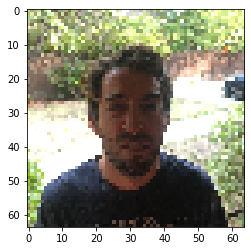

In [32]:
import tensorflow as tf


img_path = 'images/my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.inception_v3.preprocess_input(x)

print(happyModel.predict(x))